<a href="https://colab.research.google.com/github/Baah134/Baah134/blob/main/CNNvsANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()
y_train.shape

(50000, 1)

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
classes = ["airplane", 'automobile', 'bird','cat','deer', 'dog','frog', 'horse', 'ship','truck']

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


In [23]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
artificial_model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

artificial_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

artificial_model.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2749 - loss: 2.2198
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3941 - loss: 1.6791
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4324 - loss: 1.5795
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4541 - loss: 1.5222
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4730 - loss: 1.4692
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4810 - loss: 1.4497
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4855 - loss: 1.4242
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4972 - loss: 1.3978
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5077 - loss: 1.3714
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5123 - loss: 1.3552
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5215 - loss: 1.3306
Epoch 12/20
1563/1563 ━━━━

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = artificial_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.61      0.54      1000
           1       0.62      0.59      0.61      1000
           2       0.34      0.46      0.39      1000
           3       0.33      0.31      0.32      1000
           4       0.48      0.32      0.38      1000
           5       0.41      0.41      0.41      1000
           6       0.53      0.51      0.52      1000
           7       0.55      0.52      0.53      1000
           8       0.62      0.64      0.63      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [ ]:
artificial_model.evaluate(X_test, y_test)

NameError: name 'artificial_model' is not defined

In [40]:
convolutional_model = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'),


    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [41]:
convolutional_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
final_convolutional_model = convolutional_model.fit(X_train, y_train, epochs=30)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2802 - loss: 1.9081
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5266 - loss: 1.3135
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6027 - loss: 1.1248
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6517 - loss: 0.9814
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6915 - loss: 0.8761
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7180 - loss: 0.8004
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7427 - loss: 0.7270
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7590 - loss: 0.6828
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7803 - loss: 0.6234
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7987 - loss: 0.5691
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8083 - loss: 0.5375
Epoch 12/30
1563/1563 ━━━━━

In [43]:
convolutional_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6802 - loss: 1.8713


[1.9163178205490112, 0.6787999868392944]

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = convolutional_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.84      0.84      0.84      1000
           2       0.59      0.60      0.60      1000
           3       0.49      0.59      0.54      1000
           4       0.69      0.56      0.62      1000
           5       0.68      0.57      0.62      1000
           6       0.69      0.84      0.76      1000
           7       0.74      0.72      0.73      1000
           8       0.83      0.80      0.81      1000
           9       0.79      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = convolutional_model.predict(X_train)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_train, y_pred_classes))


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.94      0.96      0.95      5000
           2       0.80      0.83      0.82      5000
           3       0.68      0.79      0.73      5000
           4       0.90      0.76      0.83      5000
           5       0.83      0.72      0.77      5000
           6       0.81      0.96      0.88      5000
           7       0.91      0.89      0.90      5000
           8       0.95      0.91      0.93      5000
           9       0.93      0.93      0.93      5000

    accuracy                           0.86     50000
   macro avg       0.87      0.86      0.86     50000
weighted avg       0.87      0.86      0.86     50000



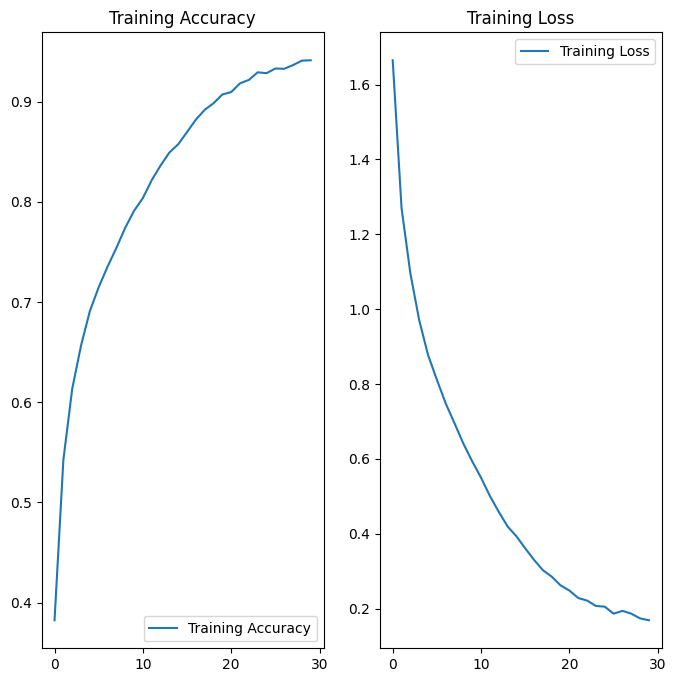

In [44]:
EPOCHS = 30

acc = final_convolutional_model.history['accuracy']
loss = final_convolutional_model.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()